In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_auc_score
from sklearn.decomposition import TruncatedSVD, PCA
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from datetime import datetime
from time import strptime

import re
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

In [5]:
# read data
df_train = pd.read_csv('../cup1_datasets/train.csv')
df_test = pd.read_csv('../cup1_datasets/test.csv')
df = df_train+df_test

In [6]:
display(df_test.head(5))
display(df_train.head(5))

,Id,Page content
0,27643,"<html><head><div class=""article-info""><span cl..."
1,27644,"<html><head><div class=""article-info""><span cl..."
2,27645,"<html><head><div class=""article-info""><span cl..."
3,27646,"<html><head><div class=""article-info""><span cl..."
4,27647,"<html><head><div class=""article-info""><span cl..."


,Id,Popularity,Page content
0,0,-1,"<html><head><div class=""article-info""> <span c..."
1,1,1,"<html><head><div class=""article-info""><span cl..."
2,2,1,"<html><head><div class=""article-info""><span cl..."
3,3,-1,"<html><head><div class=""article-info""><span cl..."
4,4,-1,"<html><head><div class=""article-info""><span cl..."


In [7]:
# show one of page content
test_soup = BeautifulSoup(df_train.loc[3, 'Page content'], 'html.parser')
test_xml_soup = BeautifulSoup(df_train.loc[3, 'Page content'], 'lxml')
#print(test_soup.prettify())
print(test_xml_soup.prettify())


<html>
 <head>
 </head>
 <body>
  <div class="article-info">
   <span class="byline">
    <a href="/author/sam-laird/">
     <img alt="2016%2f09%2f15%2f63%2fhttpsd2mhye01h4nj2n.cloudfront.netmediazgkymde1lza2.9814b" class="author_image" src="http://i.amz.mshcdn.com/-qaMPB8aiQeIaoBhqlU0OLjA07A=/90x90/2016%2F09%2F15%2F63%2Fhttpsd2mhye01h4nj2n.cloudfront.netmediaZgkyMDE1LzA2.9814b.jpg"/>
    </a>
    <span class="author_name">
     By
     <a href="/author/sam-laird/">
      Sam Laird
     </a>
    </span>
    <time datetime="Fri, 11 Oct 2013 02:26:50 +0000">
     2013-10-11 02:26:50 UTC
    </time>
   </span>
  </div>
  <h1 class="title">
   Cameraperson Fails Deliver Slapstick Laughs
  </h1>
  <figure class="article-image">
  </figure>
  <article data-channel="watercooler">
   <section class="article-content">
    <div class="shift-to-hero">
     <p>
      <iframe allowfullscreen="" frameborder="0" height="360" src="https://www.youtube.com/embed/BI3UznQUMko?enablejsapi=1&amp;" width="64

In [8]:
# playground of beautiful soup

# 1. count numbers of word
tag_word = test_soup.find_all('p')
tag_xml_word = test_xml_soup.find_all('p')
'''
num_words = 0
for word in tag_word:
    #print(type(word.get_text()) # get words only
    para_str = word.get_text()
    word_list = para_str.split()
    num_words += len(word_list)
    
print(num_words)
'''
n = 0
for words in tag_xml_word:
    n += len(words.get_text().split())
print(n)

# 2. 


187


In [9]:
# feature engineering
'''
1. which day on the week
2. 
'''

            
def fetch_datetime(text=[]):

    day = []
    
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        if soup.time.has_attr('datetime'):
            date = soup.time.attrs['datetime']
            day.append(' '+ date[0:3])
        else:
            day.append(' noneday')
    return day


def fetch_channel(text=[]):
    
    channels = []
    
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        channel = soup.article['data-channel']
        channels.append(channel)
    return channels

def fetch_img_count(text=[]):

    count = []
    
    for tx in text:
        
        soup = BeautifulSoup(tx, "lxml")
        c = 0
        find_all_images = soup.find_all('img')
        
        for i in find_all_images:
            c = c+1
        count.append(c)
    return count

def fetch_topics(text=[]):

    topics = []
    
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        footer = soup.footer
        ta = footer.find_all('a')
        topic = []

        for t in ta:
            topic.append(t.get_text())
        ff = ' '.join(topic)
        topics.append(ff)

    return topics

def fetch_authors(text=[]):

    authors = []
    
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        footer = soup.span
        if footer != None:
            ta = footer.findAll('a')
            author = []
            for t in ta:
                author.append(t.get_text())
            if len(author) == 0:
                ff = 'NaN'
            else:
                ff = ''.join(author)
        else:
            ff = 'NaN'
        authors.append(ff)

    return authors

def fetch_titles(text=[]):
    
    titles = []
    
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        footer = soup.h1
        if footer != None:
            ff = footer.get_text()
        else:
            ff = 'NaN'
        titles.append(ff)
        
    return titles

def fetch_social_media_count(text=[]):
    count = []
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        c = 0
        for frame in soup("iframe"):
#             print(frame.get('src').split("."))
            if frame.get('src').find("youtube") != None:
                c = c+1
            elif frame.get('src').find("instagram") != None:
                c = c+1
            elif frame.get('src').find("vine") != None:
                c= c+1
            # apply new media here

        count.append(c)
    return count

In [10]:
# additional features:
'''
1. publish day
2. numbers of words
'''
def fetch_pub_day(text = []):
    
    pub_day = []

    # datetime format: Fri, 11 Oct 2013 02:26:50 +0000

    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        if soup.time.has_attr('datetime'):
            str_date = soup.time.attrs['datetime']
            datetime_obj = datetime.strptime(str_date[:-6], '%a, %d %b %Y %X')
            pub_day.append(datetime_obj)
        else:
            # can be modified
            fix_datetime_obj = datetime.strptime("Fri, 11 Oct 2013 02:26:50", '%a, %d %b %Y %X')
            pub_day.append(fix_datetime_obj)
    return pub_day

def fetch_num_words(text = []):
    num_word_list = []
    
    for tx in text:
        soup = BeautifulSoup(tx, "lxml")
        
        num_words = 0
        para_tag = soup.find_all('p')
        for para in para_tag:
            para_str = para.get_text()
            word_list = para_str.split()
            num_words += len(word_list)
        
        num_word_list.append(num_words)
    return num_word_list
        

In [11]:
# fetch training features
'''
topic_batch   = fetch_topics            (df_train[:]['Page content'])
channel_batch = fetch_channel           (df_train[:]['Page content'])
weekday_batch = fetch_datetime          (df_train[:]['Page content'])
author_batch  = fetch_authors           (df_train[:]['Page content'])
img_batch     = fetch_img_count         (df_train[:]['Page content'])
title_batch   = fetch_titles            (df_train[:]['Page content'])
media_batch   = fetch_social_media_count(df_train[:]['Page content'])
'''

"\ntopic_batch   = fetch_topics            (df_train[:]['Page content'])\nchannel_batch = fetch_channel           (df_train[:]['Page content'])\nweekday_batch = fetch_datetime          (df_train[:]['Page content'])\nauthor_batch  = fetch_authors           (df_train[:]['Page content'])\nimg_batch     = fetch_img_count         (df_train[:]['Page content'])\ntitle_batch   = fetch_titles            (df_train[:]['Page content'])\nmedia_batch   = fetch_social_media_count(df_train[:]['Page content'])\n"

In [12]:
# fetch additional features
'''
pub_day_batch = fetch_pub_day(df_train[:]['Page content'])
num_words_batch = fetch_num_words(df_train[:]['Page content'])
'''

"\npub_day_batch = fetch_pub_day(df_train[:]['Page content'])\nnum_words_batch = fetch_num_words(df_train[:]['Page content'])\n"

In [13]:
def construct_train_features(df):
    return pd.DataFrame({'Id':df.Id[:],
                           'topic':fetch_topics                   (df[:]['Page content']),
                           'channel':fetch_channel                (df[:]['Page content']),
                           'weekday':fetch_datetime               (df[:]['Page content']),
                           'author':fetch_authors                 (df[:]['Page content']),
                           'img count':fetch_img_count            (df[:]['Page content']),
                           'title':fetch_titles                   (df[:]['Page content']),
                           'media count': fetch_social_media_count(df[:]['Page content']),
                           # addtional
                           'pub_date': fetch_pub_day              (df[:]['Page content']),
                           'num_words': fetch_num_words           (df[:]['Page content']),
                           'Page Content':                        (df[:]['Page content']),
                           'Popularity':df.Popularity[:]})

In [14]:
def construct_test_features(df):
    return pd.DataFrame({'Id':df.Id[:],
                           'topic':fetch_topics                   (df[:]['Page content']),
                           'channel':fetch_channel                (df[:]['Page content']),
                           'weekday':fetch_datetime               (df[:]['Page content']),
                           'author':fetch_authors                 (df[:]['Page content']),
                           'img count':fetch_img_count            (df[:]['Page content']),
                           'title':fetch_titles                   (df[:]['Page content']),
                           'media count': fetch_social_media_count(df[:]['Page content']),
                           # addtional
                           'pub_date': fetch_pub_day              (df[:]['Page content']),
                           'num_words': fetch_num_words           (df[:]['Page content']),
                           'Page Content':                        (df[:]['Page content'])
                        })

In [15]:
# may convert page content to abstract 
# maybe tf-idf will perform better after this

# ref: https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70


In [16]:
# re-consturct training data
df_train_feature = construct_train_features(df_train)
display(df_train_feature.head(5))

,Id,topic,channel,weekday,author,img count,title,media count,pub_date,num_words,Page Content,Popularity
0,0,Asteroid Asteroids challenge Earth Space U.S. ...,world,Wed,NaN,1,NASA's Grand Challenge: Stop Asteroids From De...,0,2013-06-19 15:04:30,536,"<html><head><div class=""article-info""> <span c...",-1
1,1,Apps and Software Google open source opn pledg...,tech,Thu,Christina Warren,2,Google's New Open Source Patent Pledge: We Won...,0,2013-03-28 17:40:55,305,"<html><head><div class=""article-info""><span cl...",1
2,2,Entertainment NFL NFL Draft Sports Television,entertainment,Wed,Sam Laird,2,Ballin': 2014 NFL Draft Picks Get to Choose Th...,25,2014-05-07 19:15:20,1011,"<html><head><div class=""article-info""><span cl...",1
3,3,Sports Video Videos Watercooler,watercooler,Fri,Sam Laird,1,Cameraperson Fails Deliver Slapstick Laughs,21,2013-10-11 02:26:50,187,"<html><head><div class=""article-info""><span cl...",-1
4,4,Entertainment instagram instagram video NFL Sp...,entertainment,Thu,Connor Finnegan,52,NFL Star Helps Young Fan Prove Friendship With...,1,2014-04-17 03:31:43,182,"<html><head><div class=""article-info""><span cl...",-1


In [17]:
# re-consturct testing data
df_test_feature = construct_test_features(df_test)
display(df_test_feature.head(5))

,Id,topic,channel,weekday,author,img count,title,media count,pub_date,num_words,Page Content
0,27643,Entertainment Music One Direction soccer Sports,entertainment,Mon,Sam Laird,1,Soccer Star Gets Twitter Death Threats After T...,7,2013-09-09 19:47:02,475,"<html><head><div class=""article-info""><span cl..."
1,27644,Gadgets glass Google Google Glass Google Glass...,tech,Thu,Stan Schroeder,3,Google Glass Gets an Accessory Store,0,2013-10-31 09:25:02,142,"<html><head><div class=""article-info""><span cl..."
2,27645,amazon amazon kindle Business Gaming,business,Tue,Todd Wasserman,2,OUYA Gaming Console Already Sold Out on Amazon,0,2013-06-25 12:54:54,164,"<html><head><div class=""article-info""><span cl..."
3,27646,Between Two Ferns Movies The Oscars Oscars 201...,film,Wed,Neha Prakash,1,'Between Two Ferns' Mocks Oscar Nominees,4,2013-02-13 03:30:21,153,"<html><head><div class=""article-info""><span cl..."
4,27647,American Sniper Awards Bradley Cooper clint ea...,entertainment,Fri,Josh Dickey,1,'American Sniper' Trailer: Looks Like Eastwood...,1,2014-10-03 01:34:54,219,"<html><head><div class=""article-info""><span cl..."


In [18]:
# store training and testing data
df_train_feature.to_csv('../chk_output/train_feature.csv',index=False,header=True)
df_test_feature.to_csv('../chk_output/test_feature.csv',index=False,header=True)

In [19]:
# (version 2)adding time variable features for training and testing data
def add_time_features(train):    
    train['day_of_month'] = train['pub_date'].apply(lambda x: x.day)
    train['month'] = train['pub_date'].apply(lambda x: x.month)
    train['day_of_week'] = train['pub_date'].apply(lambda x: x.dayofweek)
    train['hour'] = train['pub_date'].apply(lambda x: x.hour)
    train['ymd'] = train['pub_date'].apply(lambda x: str(x)[:10])
    train['ymd'] = pd.to_datetime(train['ymd'])
    
    return train

In [20]:
# adding Time Variable features for training data
df_train_feature = add_time_features(df_train_feature)
display(df_train_feature.head(5))

,Id,topic,channel,weekday,author,img count,title,media count,pub_date,num_words,Page Content,Popularity,day_of_month,month,day_of_week,hour,ymd
0,0,Asteroid Asteroids challenge Earth Space U.S. ...,world,Wed,NaN,1,NASA's Grand Challenge: Stop Asteroids From De...,0,2013-06-19 15:04:30,536,"<html><head><div class=""article-info""> <span c...",-1,19,6,2,15,2013-06-19
1,1,Apps and Software Google open source opn pledg...,tech,Thu,Christina Warren,2,Google's New Open Source Patent Pledge: We Won...,0,2013-03-28 17:40:55,305,"<html><head><div class=""article-info""><span cl...",1,28,3,3,17,2013-03-28
2,2,Entertainment NFL NFL Draft Sports Television,entertainment,Wed,Sam Laird,2,Ballin': 2014 NFL Draft Picks Get to Choose Th...,25,2014-05-07 19:15:20,1011,"<html><head><div class=""article-info""><span cl...",1,7,5,2,19,2014-05-07
3,3,Sports Video Videos Watercooler,watercooler,Fri,Sam Laird,1,Cameraperson Fails Deliver Slapstick Laughs,21,2013-10-11 02:26:50,187,"<html><head><div class=""article-info""><span cl...",-1,11,10,4,2,2013-10-11
4,4,Entertainment instagram instagram video NFL Sp...,entertainment,Thu,Connor Finnegan,52,NFL Star Helps Young Fan Prove Friendship With...,1,2014-04-17 03:31:43,182,"<html><head><div class=""article-info""><span cl...",-1,17,4,3,3,2014-04-17


In [21]:
# adding Time Variable features for testing data
df_test_feature = add_time_features(df_test_feature)
display(df_test_feature.head(5))

,Id,topic,channel,weekday,author,img count,title,media count,pub_date,num_words,Page Content,day_of_month,month,day_of_week,hour,ymd
0,27643,Entertainment Music One Direction soccer Sports,entertainment,Mon,Sam Laird,1,Soccer Star Gets Twitter Death Threats After T...,7,2013-09-09 19:47:02,475,"<html><head><div class=""article-info""><span cl...",9,9,0,19,2013-09-09
1,27644,Gadgets glass Google Google Glass Google Glass...,tech,Thu,Stan Schroeder,3,Google Glass Gets an Accessory Store,0,2013-10-31 09:25:02,142,"<html><head><div class=""article-info""><span cl...",31,10,3,9,2013-10-31
2,27645,amazon amazon kindle Business Gaming,business,Tue,Todd Wasserman,2,OUYA Gaming Console Already Sold Out on Amazon,0,2013-06-25 12:54:54,164,"<html><head><div class=""article-info""><span cl...",25,6,1,12,2013-06-25
3,27646,Between Two Ferns Movies The Oscars Oscars 201...,film,Wed,Neha Prakash,1,'Between Two Ferns' Mocks Oscar Nominees,4,2013-02-13 03:30:21,153,"<html><head><div class=""article-info""><span cl...",13,2,2,3,2013-02-13
4,27647,American Sniper Awards Bradley Cooper clint ea...,entertainment,Fri,Josh Dickey,1,'American Sniper' Trailer: Looks Like Eastwood...,1,2014-10-03 01:34:54,219,"<html><head><div class=""article-info""><span cl...",3,10,4,1,2014-10-03


In [22]:
# store training and testing data
df_train_feature.to_csv('../chk_output/train_feature.csv',index=False,header=True)
df_test_feature.to_csv('../chk_output/test_feature.csv',index=False,header=True)

In [23]:
# 2. Exploring Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_train_feature['Popularity'].value_counts(normalize=True)

-1    0.506855
 1    0.493145
Name: Popularity, dtype: float64

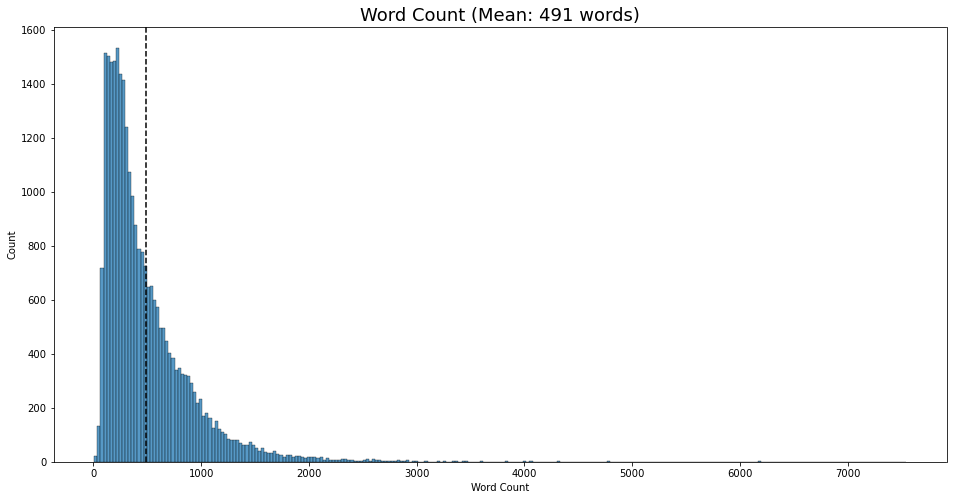

In [25]:
# Close to a normal distribution, with a positive skew
plt.figure(figsize=(16,8))
mean = df_train_feature['num_words'].mean()
plt.axvline(mean, ls='--', color='black')
sns.histplot(df_train_feature['num_words'])
plt.xlabel('Word Count')
plt.title(f'Word Count (Mean: {mean:.0f} words)', fontsize=18);

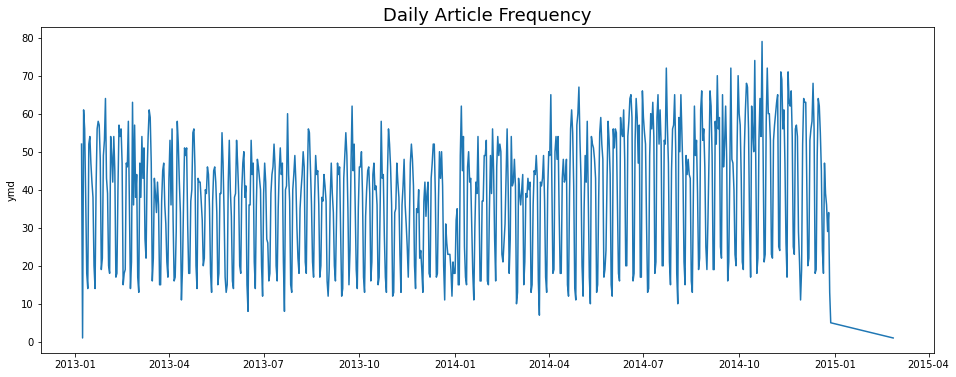

In [26]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_train_feature['ymd'].value_counts())
plt.title('Daily Article Frequency', fontsize=18);
#plt.xlim('2020-03', '2020-05');

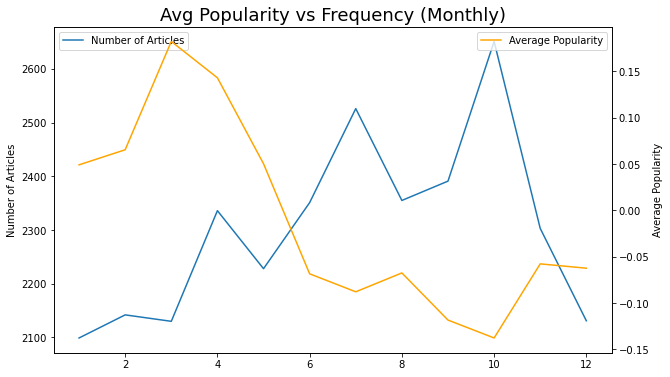

In [27]:
# Month v.s. popularity
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_train_feature['month'].value_counts(), label='Number of Articles')
ax.set_ylabel('Number of Articles')
ax.legend(loc=2)
ax2 = ax.twinx()
sns.lineplot(data=df_train_feature.groupby('month').mean()['Popularity'], color='orange', ax=ax2, label='Average Popularity')
ax2.set_ylabel('Average Popularity')
ax2.legend(loc=1)
plt.title('Avg Popularity vs Frequency (Monthly)', fontsize=18);

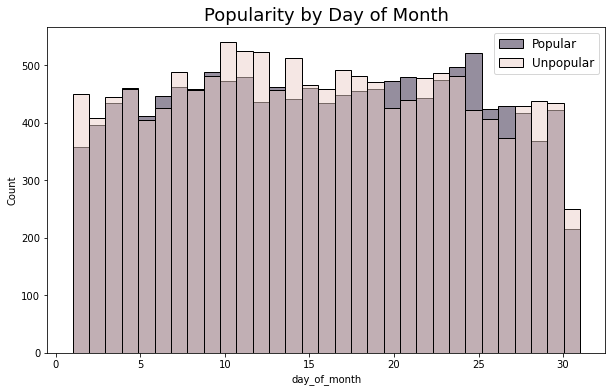

In [28]:
# day_of_month v.s. popularity ()
plt.figure(figsize=(10,6))
sns.histplot(data=df_train_feature, x='day_of_month', hue='Popularity')
plt.legend(labels=['Popular', 'Unpopular'], fontsize=12)
plt.title('Popularity by Day of Month', fontsize=18);

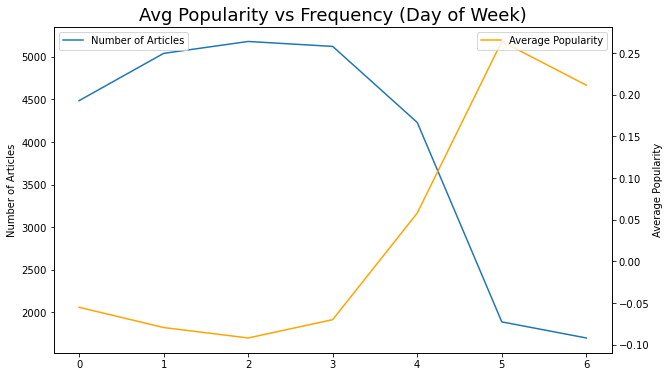

In [29]:
# day_of_week v.s. popularity (how to let it in acending order?)
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_train_feature['day_of_week'].value_counts(), label='Number of Articles')
ax.set_ylabel('Number of Articles')
ax.legend(loc=2)
ax2 = ax.twinx()
sns.lineplot(data=df_train_feature.groupby('day_of_week').mean()['Popularity'], color='orange', ax=ax2, label='Average Popularity')
ax2.set_ylabel('Average Popularity')
ax2.legend(loc=1)
plt.title('Avg Popularity vs Frequency (Day of Week)', fontsize=18);

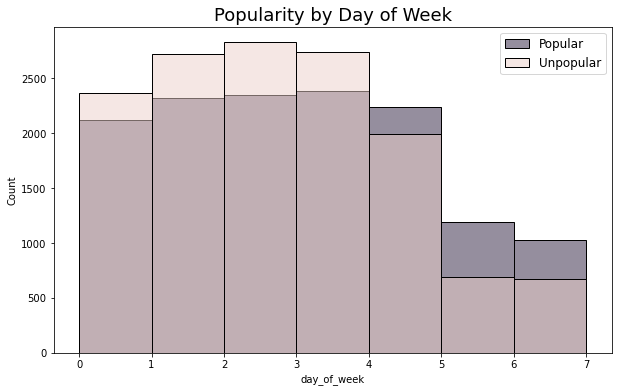

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_train_feature, x='day_of_week', hue='Popularity', bins = np.arange(0, 8))
plt.legend(labels=['Popular', 'Unpopular'], fontsize=12)
plt.title('Popularity by Day of Week', fontsize=18);

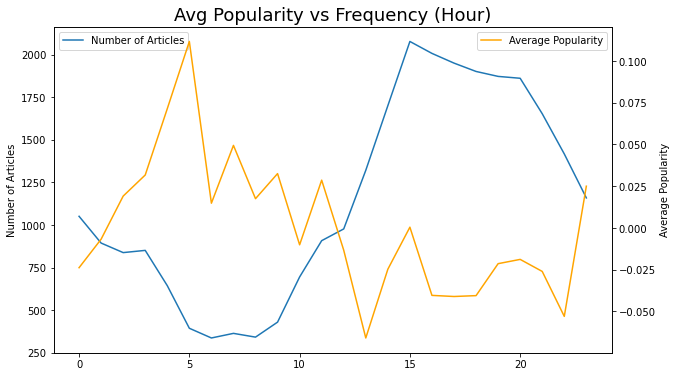

In [31]:
# hour v.s. popularity
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_train_feature['hour'].value_counts(), label='Number of Articles')
ax.set_ylabel('Number of Articles')
ax.legend(loc=2)
ax2 = ax.twinx()
sns.lineplot(data=df_train_feature.groupby('hour').mean()['Popularity'], color='orange', ax=ax2, label='Average Popularity')
ax2.set_ylabel('Average Popularity')
ax2.legend(loc=1)
plt.title('Avg Popularity vs Frequency (Hour)', fontsize=18);

In [32]:
def find_top_n(train, feature, n):
    df = train[feature].value_counts(ascending=False).reset_index()
    df.columns=[feature, 'n_articles']
    temp = pd.merge(df, train.groupby(feature).mean()['Popularity'].reset_index()).head(10)
    temp['n_articles'].sum()
    
    g_index = df[feature].head(n).values
    g_df = train[train[feature].isin(g_index)]
    g_data = g_df.groupby(feature).mean()['Popularity'].sort_values(ascending=False)
    g_data = g_data.to_frame().reset_index()
    display(g_data.head())
    
    plt.figure(figsize=(12, 12))
    sns.barplot(data=g_data, y=g_data[feature], x=g_data['Popularity'], orient='h', palette='coolwarm_r')
    plt.xlabel('Average Popularity')
    #plt.ylabel('Newsdesk')
    plt.xticks(np.arange(-1.0, 0.0, 1.0), fontsize=12)
    plt.yticks(fontsize=12)
    #plt.title('Newsdesk Avg. Popularity', fontsize=18);
    plt.axvline(0.0, ls='--', color='black')
    #plt.savefig(fname='newsdesk',dpi=180)
    
    # Viewing top features by proportion of popularity
    g_index = df[feature].head(n).values
    g_df = train[train[feature].isin(g_index)]
    order = g_df.groupby(feature).mean()['Popularity'].sort_values(ascending=False).index
    plt.figure(figsize=(12,12))
    sns.countplot(data=g_df, y=feature, hue='Popularity', order=order)
    plt.legend(labels=['Not Popular', 'Popular'], fontsize=12, loc='best')
    plt.title('Total Popular vs Unpopular Articles per ' + feature , fontsize=18);
    return

In [33]:
def find_last_n(train, feature, n):
    df = train[feature].value_counts(ascending=False).reset_index()
    df.columns=[feature, 'n_articles']
    temp = pd.merge(df, train.groupby(feature).mean()['Popularity'].reset_index()).head(10)
    temp['n_articles'].sum()
    
    g_index = df[feature].tail(n).values
    g_df = train[train[feature].isin(g_index)]
    g_data = g_df.groupby(feature).mean()['Popularity'].sort_values(ascending=False)
    g_data = g_data.to_frame().reset_index()
    display(g_data.head())
    
    plt.figure(figsize=(12, 12))
    sns.barplot(data=g_data, y=g_data[feature], x=g_data['Popularity'], orient='h', palette='coolwarm_r')
    plt.xlabel('Average Popularity')
    #plt.ylabel('Newsdesk')
    plt.xticks(np.arange(-1.0, 0.0, 1.0), fontsize=12)
    plt.yticks(fontsize=12)
    #plt.title('Newsdesk Avg. Popularity', fontsize=18);
    plt.axvline(0.0, ls='--', color='black')
    #plt.savefig(fname='newsdesk',dpi=180)
    
    # Viewing top newsdesks by proportion of popularity
    g_index = df[feature].tail(n).values
    g_df = train[train[feature].isin(g_index)]
    order = g_df.groupby(feature).mean()['Popularity'].sort_values(ascending=False).index
    plt.figure(figsize=(12,12))
    sns.countplot(data=g_df, y=feature, hue='Popularity', order=order)
    plt.legend(labels=['Not Popular', 'Popular'], fontsize=12, loc='best')
    plt.title('Total Popular vs Unpopular Articles per ' + feature, fontsize=18);
    return

(27643, 17)
428


,author,Popularity
0,Anita Li,0.426621
1,Chris Taylor,0.124668
2,Emily Price,0.093851
3,Annie Colbert,0.042735
4,Adario Strange,0.029178


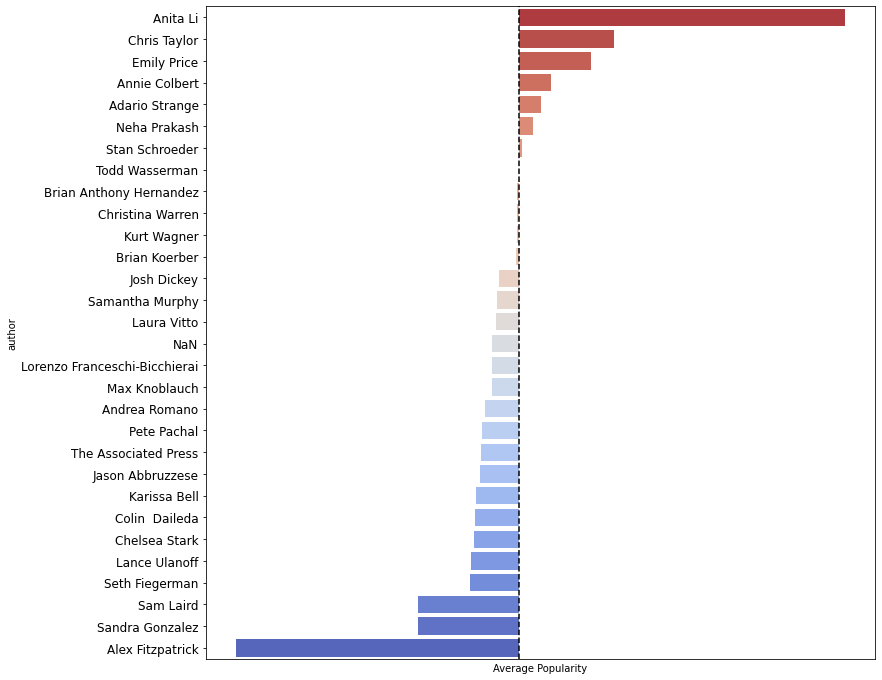

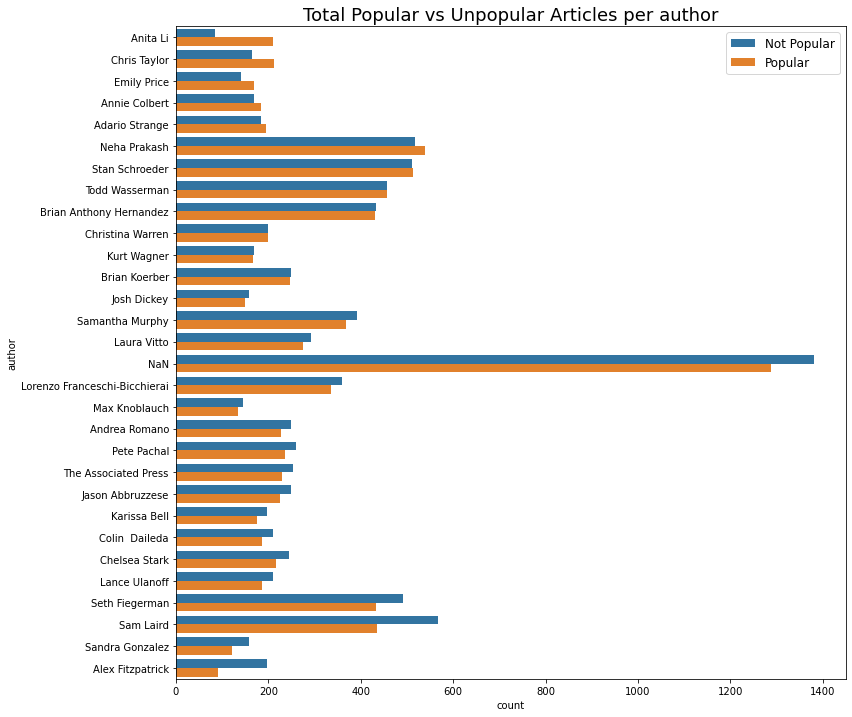

In [34]:
# author v.s. Popularity

# see number of unique author
print(df_train_feature.shape)
print(df_train_feature['author'].nunique())

find_top_n(df_train_feature, 'author', 30)

,author,Popularity
0,Jonah Berger,1.0
1,Carolyn Wickware,1.0
2,Chen Amit,1.0
3,Peter Pomerantsev,1.0
4,Jamie Shupak,1.0


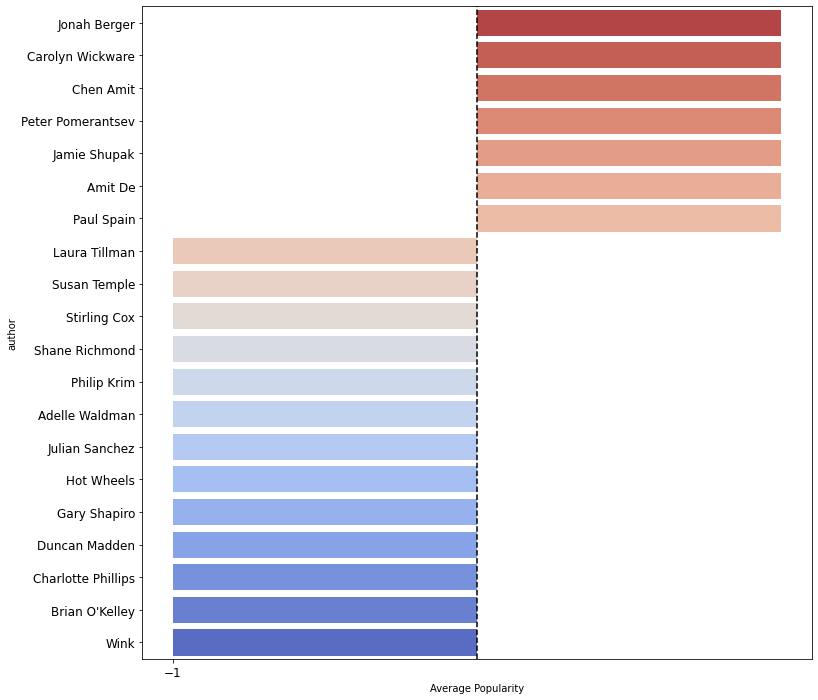

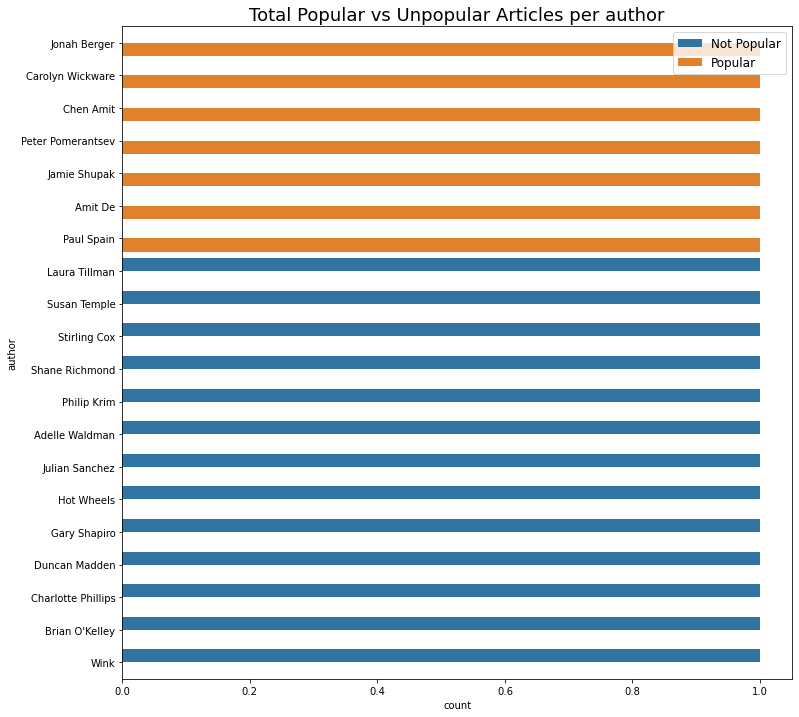

In [35]:
find_last_n(df_train_feature, 'author', 20)

(27643, 17)
33


,channel,Popularity
0,socmed,1.0
1,sports,1.0
2,mob,1.0
3,viral,1.0
4,comics,1.0


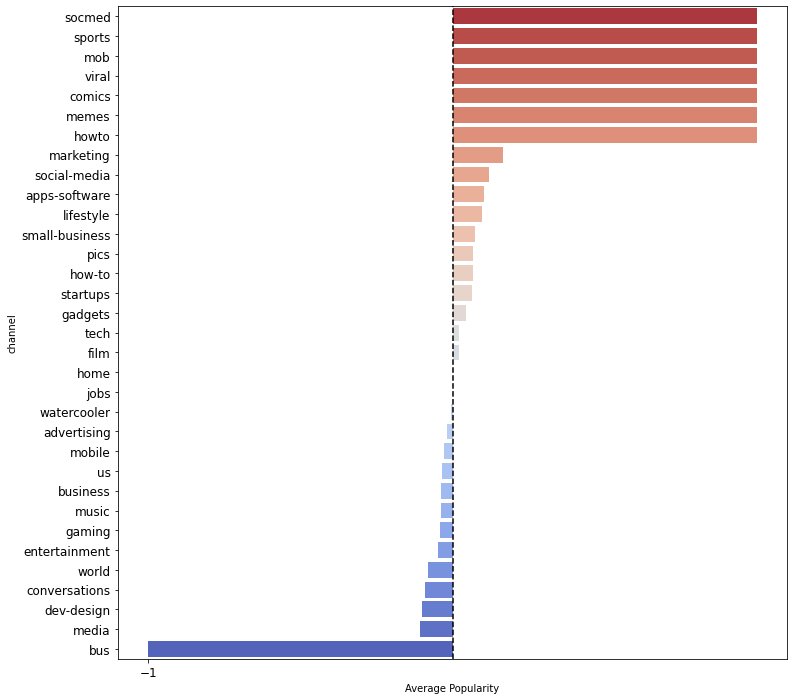

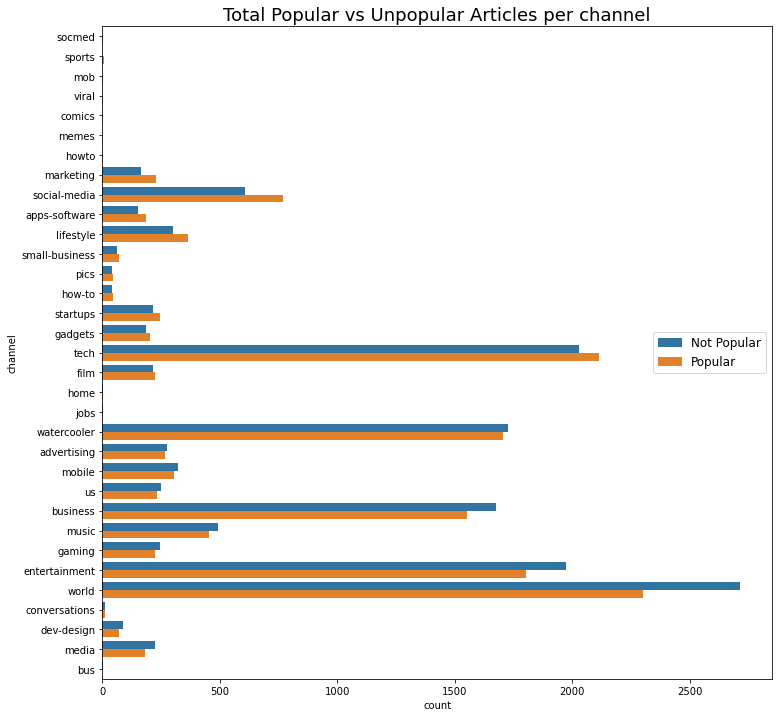

In [36]:
# channel v.s. popularity


# see number of unique channel
print(df_train_feature.shape)
print(df_train_feature['channel'].nunique())

find_top_n(df_train_feature, 'channel', 33)

In [37]:
# 3. Feature Engineering

In [38]:
# load data

In [39]:
# Time Variables
